In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.optimize as sco
import plotly.graph_objects as go

In [2]:
import plotly.io as pio
pio.templates.default = "plotly_white"

In [3]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)


my_folder_path = '/content/drive/.shortcut-targets-by-id/1YI63vTlNOzmSG0MwlqJMiV0-EADun9Ag/Real Estate Project/Datas'
os.chdir(my_folder_path)

Mounted at /content/drive


In [4]:
def convert_date(now):
  quarter = (now.month - 1) // 3 + 1
  year = str(now.year)[2:]
  formatted_date = '{}Q{}'.format(quarter, year)
  return formatted_date


In [5]:
df_fct0 = pd.read_excel("RE_Series.xlsx", sheet_name="Data")
df_meta = pd.read_excel("RE_Series.xlsx", sheet_name="Metadata")
df_fct0 = df_fct0.set_index("Date")
df_fct0.columns = list(df_meta["Code"].values)
df_cur = df_fct0.loc[:, "EURUSD":] # currencies
df_fct0 = df_fct0.loc[:, :"CREU"] # factor
df_res = df_fct0.resample("Q").last()
df_res.index = [convert_date(i) for i in df_res.index]
df_res

,SMI,EQUS,EQEU,EQEM,CRUS,TRUS,TRSW,CRSW,TREU,CREU
1Q80,NaN,102.09,127.983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2Q80,NaN,114.24,153.192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Q80,NaN,125.46,157.527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4Q80,NaN,135.76,152.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1Q81,NaN,136.00,146.673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1Q22,12161.53,4530.41,1927.370,1141.787,112.14770,880.6273,93.88690,97.02,240.5425,99.633
2Q22,10741.21,3785.38,1626.389,1000.668,103.25090,848.4757,88.86836,93.87,222.8021,92.786
3Q22,10267.55,3585.62,1454.897,875.786,97.63979,809.9245,89.56895,91.86,211.5574,89.768
4Q22,10729.40,3839.50,1731.581,956.378,99.86058,813.8990,84.58275,92.67,206.8313,90.126


**CURRENCY CONVERSION**

In [6]:
def format_chart(fig):
  fig.update_layout(
    width=1000,
    height=500,
    legend=dict(
        title=None,
        #x=0.005,
        #y=0.995,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
  ))
  fig.update_xaxes(showline=True,
          linewidth=1,
          linecolor='black',
          mirror=True)

  fig.update_yaxes(showline=True,
          linewidth=1,
          linecolor='black',
          mirror=True)
  return fig

In [7]:
df_fct = df_fct0.copy()
df_fct[["EQUS", "EQEU", "EQEM", "CRUS", "TRUS"]] = df_fct[["EQUS", "EQEU", "EQEM", "CRUS", "TRUS"]].mul((1/df_cur["USDCHF"]), axis=0)
df_fct[["CREU", "TREU"]] = df_fct[["CREU", "TREU"]].mul(df_cur["CHFEUR"], axis=0)  

sel = "EQUS"
fig = px.line(df_fct, x=df_fct.index, y=df_fct[sel])
fig.add_trace(go.Scatter(x=df_fct0.index, y=df_fct0[sel], name="before conversion"))
fig = format_chart(fig)
fig.show()

In [8]:
df_sec_re = pd.read_excel("Wupix.xls").set_index("Date")
df_sec_re = df_sec_re.resample("Q").last()
df_sec_re.index = [convert_date(i) for i in df_sec_re.index]
df_sec_re

,WUPIX-A,WUPIX-F,KGAST Immo-Index,SPI
1Q97,115.77,107.21,101.69,117.94
2Q97,124.96,112.93,102.80,144.35
3Q97,112.61,115.18,103.65,146.89
4Q97,104.81,120.95,103.89,155.89
1Q98,141.23,126.66,105.00,189.09
...,...,...,...,...
1Q22,726.50,430.87,352.35,615.80
2Q22,657.46,381.36,355.76,548.26
3Q22,615.04,372.23,360.26,521.79
4Q22,643.59,379.19,365.03,544.32


In [9]:
df_re = pd.read_excel("RE_Data.xls", sheet_name="Time series invest")
df_re.columns = ["Date1", "Date", "SI_TR", "SI_PR", "delete"]
df_re.drop(["Date1", "delete"], axis=1, inplace=True)
df_re = df_re.dropna().set_index("Date")
df_re.index = df_re.index.astype(str)
df_re = df_re["SI_TR"].to_frame()
df_re

,SI_TR
Date,
4Q86,95.400000
1Q87,97.470000
2Q87,99.470000
3Q87,101.380000
4Q87,99.900000
...,...
4Q21,524.590825
1Q22,534.323096
2Q22,542.383335


Merge DataFrame

In [10]:
df_re = df_re.merge(df_res, left_index=True, right_index=True, how="inner").merge(df_sec_re["WUPIX-F"], left_index=True, right_index=True, how="inner")
df_re

,SI_TR,SMI,EQUS,EQEU,EQEM,CRUS,TRUS,TRSW,CRSW,TREU,CREU,WUPIX-F
1Q97,99.840000,4659.20,757.12,907.148,514.608,106.20740,302.5951,NaN,NaN,NaN,NaN,107.21
2Q97,100.810000,5620.60,885.14,983.669,554.125,108.62850,312.9138,NaN,NaN,NaN,NaN,112.93
3Q97,101.320000,5673.60,947.28,1060.528,502.045,111.35530,323.4925,NaN,NaN,NaN,NaN,115.18
4Q97,100.000000,6265.50,970.43,1056.662,412.465,113.17600,334.4197,NaN,NaN,NaN,NaN,120.95
1Q98,102.090000,7585.50,1101.75,1266.257,436.016,113.18840,339.5016,NaN,NaN,NaN,NaN,126.66
...,...,...,...,...,...,...,...,...,...,...,...,...
4Q21,524.590825,12875.66,4766.18,2093.274,1232.008,121.74750,931.3469,101.59840,103.01,253.8298,104.933,448.65
1Q22,534.323096,12161.53,4530.41,1927.370,1141.787,112.14770,880.6273,93.88690,97.02,240.5425,99.633,430.87
2Q22,542.383335,10741.21,3785.38,1626.389,1000.668,103.25090,848.4757,88.86836,93.87,222.8021,92.786,381.36
3Q22,556.550863,10267.55,3585.62,1454.897,875.786,97.63979,809.9245,89.56895,91.86,211.5574,89.768,372.23


STATS

In [11]:
df_re.isna().sum()

SI_TR       0
SMI         0
EQUS        0
EQEU        0
EQEM        0
CRUS        0
TRUS        0
TRSW       11
CRSW       39
TREU        8
CREU       11
WUPIX-F     0
dtype: int64

In [12]:
print(len(df_re))
df_re_all = df_re
df_re_chart = df_re.dropna()
print(len(df_re_all))

104
104


In [13]:
df_rets = (df_re_all / df_re_all.shift() - 1)[1:]
df_norm = df_re_all/df_re_all.values[0]

In [15]:
df_norm_chart = df_re_chart/df_re_chart.values[0]
fig = px.line(df_norm_chart.reset_index(), x="index", y=df_norm_chart.columns)
fig = format_chart(fig)
fig.show()

**Set frontier parameters**

In [ ]:
num_portfolios = 1000
risk_free_rate = 0.01

### Returns

In [ ]:
df_stats = df_rets.describe().T
df_stats["ann_mean"] = df_stats["mean"]*4
df_stats["ann_std"] = df_stats["std"]*np.sqrt(4)
df_stats["Sharpe Ratio"] = (df_stats["ann_mean"] - risk_free_rate)/ df_stats["ann_std"]
df_stats = df_stats.round(2)
df_stats

,count,mean,std,min,25%,50%,75%,max,ann_mean,ann_std,Sharpe Ratio
SI_TR,103.0,0.02,0.02,-0.04,0.01,0.02,0.03,0.07,0.07,0.03,1.70
SMI,103.0,0.01,0.08,-0.27,-0.03,0.02,0.05,0.24,0.05,0.17,0.22
EQUS,103.0,0.02,0.09,-0.23,-0.02,0.03,0.07,0.21,0.08,0.17,0.40
EQEU,103.0,0.01,0.10,-0.25,-0.03,0.02,0.07,0.23,0.05,0.21,0.18
EQEM,103.0,0.01,0.12,-0.28,-0.07,0.02,0.09,0.34,0.06,0.25,0.18
CRUS,103.0,-0.00,0.03,-0.09,-0.01,0.00,0.02,0.07,-0.00,0.05,-0.20
TRUS,103.0,0.01,0.03,-0.05,-0.01,0.01,0.03,0.09,0.04,0.05,0.58
TRSW,92.0,-0.00,0.02,-0.08,-0.01,-0.00,0.01,0.04,-0.01,0.04,-0.38
CRSW,64.0,-0.00,0.02,-0.06,-0.01,-0.00,0.01,0.04,-0.01,0.03,-0.49
TREU,95.0,0.01,0.02,-0.07,-0.00,0.01,0.03,0.06,0.03,0.05,0.45


In [ ]:
fig = px.bar(df_stats, x=df_stats.index, y='Sharpe Ratio')
fig = format_chart(fig)
fig.show()

### Correlation

In [ ]:
df_corr = df_rets.corr()
print(df_corr)

fig = px.imshow(df_corr)
fig = format_chart(fig)
fig.show()

            SI_TR       SMI      EQUS      EQEU      EQEM      CRUS      TRUS  \
SI_TR    1.000000  0.031779 -0.023161 -0.038183 -0.044396 -0.120020  0.044751   
SMI      0.031779  1.000000  0.825419  0.785102  0.597390  0.228343 -0.308139   
EQUS    -0.023161  0.825419  1.000000  0.880474  0.754293  0.303703 -0.423235   
EQEU    -0.038183  0.785102  0.880474  1.000000  0.795360  0.355957 -0.358413   
EQEM    -0.044396  0.597390  0.754293  0.795360  1.000000  0.261399 -0.415849   
CRUS    -0.120020  0.228343  0.303703  0.355957  0.261399  1.000000  0.493541   
TRUS     0.044751 -0.308139 -0.423235 -0.358413 -0.415849  0.493541  1.000000   
TRSW     0.036256 -0.146368 -0.228971 -0.265574 -0.214624  0.451253  0.674623   
CRSW    -0.047105  0.470165  0.500059  0.531404  0.491272  0.810165  0.215143   
TREU     0.070310 -0.056453 -0.108839 -0.085360 -0.093870  0.582620  0.696784   
CREU    -0.025524  0.303217  0.391601  0.393889  0.387746  0.818841  0.308618   
WUPIX-F -0.149755  0.365046 

In [ ]:
! pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached arch-5.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (918 kB)
  Using cached property_cached-1.6.4-py2.py3-none-any.whl (7.8 kB)


0
                        0  n
SI_TR   SI_TR    1.000000  0
        SMI     -0.212016  0
        EQUS    -0.288094  0
        EQEU    -0.294016  0
        EQEM    -0.384773  0
...                   ... ..
WUPIX-F TRSW     0.373545  0
        CRSW     0.441525  0
        TREU     0.437980  0
        CREU     0.611815  0
        WUPIX-F  1.000000  0

[144 rows x 2 columns]
1
                        0  n
SI_TR   SI_TR    1.000000  0
        SMI     -0.212016  0
        EQUS    -0.288094  0
        EQEU    -0.294016  0
        EQEM    -0.384773  0
...                   ... ..
WUPIX-F TRSW     0.479743  1
        CRSW     0.510224  1
        TREU     0.577674  1
        CREU     0.730033  1
        WUPIX-F  1.000000  1

[288 rows x 2 columns]
2
                        0  n
SI_TR   SI_TR    1.000000  0
        SMI     -0.212016  0
        EQUS    -0.288094  0
        EQEU    -0.294016  0
        EQEM    -0.384773  0
...                   ... ..
WUPIX-F TRSW     0.172494  2
        CRSW     0

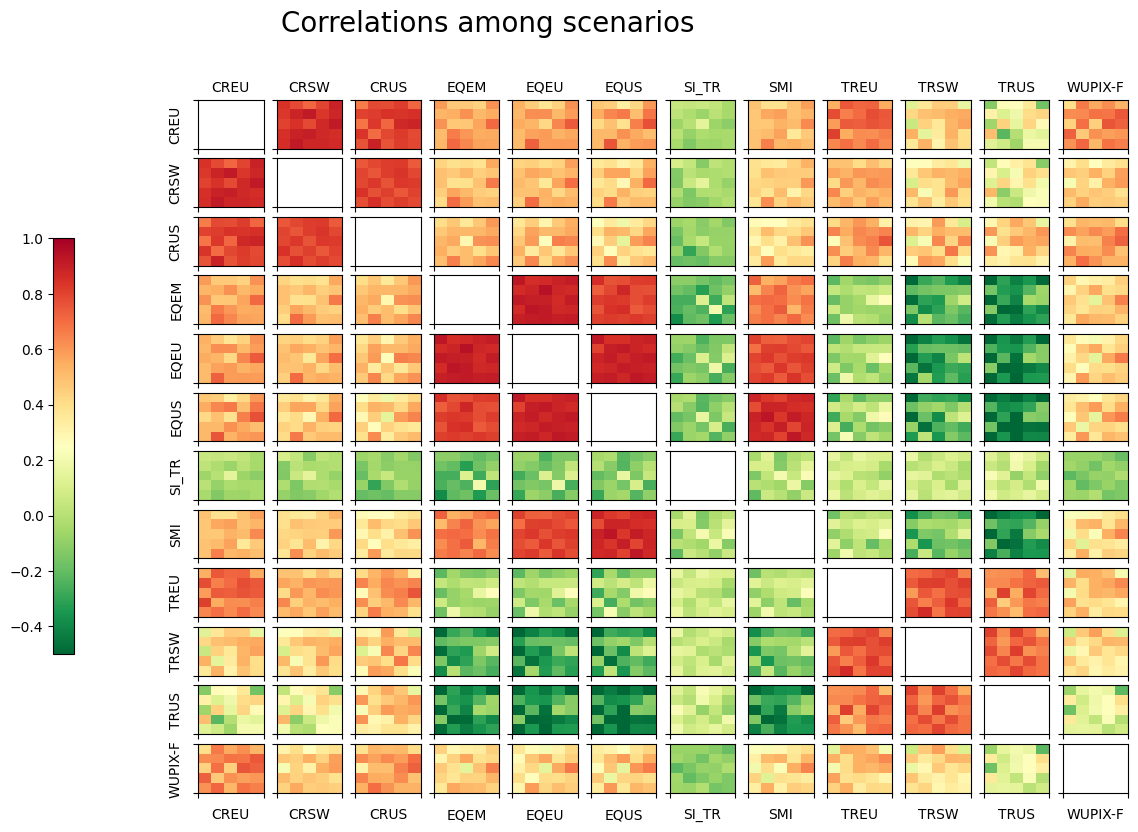

In [ ]:
from arch.bootstrap import StationaryBootstrap


def block_bootstrap(df, block_size = 10):
    
    #creating the bootstrap object
    bs = StationaryBootstrap(block_size, df.dropna())

    #printing first 5 samples
    for data in bs.bootstrap(1): #one sample at a time
        bs_x = data[0][0]
    return bs_x

detr_df = df_rets - df_rets.mean()

df_boot = pd.DataFrame()
df_new = pd.DataFrame()
for n in range(0, 25):
    print(n)
    boot = pd.DataFrame()
    """ Block bootstrap """
    boot = block_bootstrap(detr_df)
    
    """ Bootstrap
    for i in detr_df.columns:
        #x = np.random.choice(detr_df[i].dropna(), size=len(detr_df), replace=True)
        block_bootstrap
        boot[i] = x
    """
    # add the mean back
    boot = boot + df_rets.mean()
    df_corr = pd.DataFrame(boot.corr().unstack(1))
    df_corr["n"] = n
    df_boot = pd.concat([df_boot, df_corr])
    print(df_boot)
    
df_boot = df_boot.reset_index()
df_boot.columns = [ "A1", "A2", "Corr", "S"]
df_boot

resampled_corr = df_boot.pivot(index=["S", "A1"], columns="A2", values="Corr")
resampled_corr

ac = resampled_corr.columns
title='Correlations among scenarios'
fig, axs = plt.subplots(resampled_corr.shape[1], resampled_corr.shape[1])
fig.suptitle(title, fontsize=20)
fig.set_size_inches(16,9)
for i in range(0,resampled_corr.shape[1]):
    for j in range(0,resampled_corr.shape[1]):
        ax1 = axs[i, j]
        if i == j:
            pass
        else:         
            a=resampled_corr.unstack(1).loc[:,(ac[i],ac[j])]
            print(a)
            im = ax1.pcolormesh(np.reshape(a.values[0:25],[5,5]).T, 
                        vmin=-0.5,vmax=1, cmap='RdYlGn_r')
            if i==resampled_corr.shape[1]-2 and j==1:
                fig.colorbar(im, ax=axs[:, :], shrink=0.6, location='left')
            
        ax1.set_xticklabels("")
        ax1.set_ylabel("")
        ax1.set_yticklabels("")

        if i == 0:
            ax1.set_title(ac[j], fontsize=10)
        if j == 0: 
            ax1.set_ylabel(ac[i], fontsize=10)
        if i == resampled_corr.shape[1]-1: 
            ax1.set_xlabel(ac[j], fontsize=10)

**EFFICIENT FRONTIER**

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    """ Calculate portfolio performance as mean returns time weights """
    returns = np.sum(mean_returns*weights ) *4  # annualize for quarterly data
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(4)
    return std, returns

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    """ Calculate negative sharpe ratio since python does not have a maximize function """
    p_vol, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_vol

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix, other_constraints, long_only):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    if other_constraints:
      other_constraints = {'type': 'eq', 'fun': lambda x: -x[0]+0.1}
      constraints.append(other_constraints)
    bound = (0.0,1.0) if long_only else (-1, 1)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate, other_constraints, long_only):
    """ Get weights for max sharpe ratio portfolio """
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    if other_constraints:
      other_constraints = {'type': 'eq', 'fun': lambda x: -x[0]+0.1}
      constraints.append(other_constraints)
    bound = (0.0,1.0) if long_only else (-1, 1)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
  
def efficient_return(mean_returns, cov_matrix, target, other_constraints, long_only):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = [{'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    if other_constraints:
      other_constraints = {'type': 'eq', 'fun': lambda x: -x[0]+0.1}
      constraints.append(other_constraints)
    bounds = tuple((0,1) for asset in range(num_assets)) if long_only else tuple((-1,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range, other_constraints, long_only):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret, other_constraints, long_only))
    return efficients

In [ ]:
def display_ef_with_selected(returns, mean_returns, cov_matrix, risk_free_rate, other_constraints, long_only=True, limit=0.08):
    # max sharpe ratio
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate, other_constraints, long_only)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=mean_returns.index,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T


    # minimum variance
    min_vol = min_variance(mean_returns, cov_matrix, other_constraints, long_only)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=mean_returns.index,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    #annualize values
    an_vol = np.std(returns) * np.sqrt(4)
    an_rt = mean_returns * 4
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(mean_returns.index):
        print (txt,":","annuaLised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(mean_returns.index):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, limit, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target, other_constraints, long_only)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

    df_front = pd.DataFrame(target, index=[p['fun'] for p in efficient_portfolios], columns=["EF"])
    #print(efficient_portfolios)
    print([p['message'] for p in efficient_portfolios])
    return df_front, max_sharpe_allocation, min_vol_allocation

In [ ]:
"""
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(df_rets_no_re.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(df_rets_no_re.columns)))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((df_rets_no_re.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(df_rets_no_re.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(df_rets_no_re.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(df_rets_no_re.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

frontier_x = []

cons= ({'type':'eq', 'fun':check_sum})
bounds= tuple((0,1) for asset in range(df_rets_no_re.shape[1]))
init_guess = list(0.25 for asset in range(df_rets_no_re.shape[1]))
frontier_y = np.linspace(0, 0.3, 200)

def minimize_volatility(weights):
  return get_ret_vol_sr(weights)[1]

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = sco.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()
"""

"\nnp.random.seed(42)\nnum_ports = 6000\nall_weights = np.zeros((num_ports, len(df_rets_no_re.columns)))\nret_arr = np.zeros(num_ports)\nvol_arr = np.zeros(num_ports)\nsharpe_arr = np.zeros(num_ports)\n\n\nfor x in range(num_ports):\n    # Weights\n    weights = np.array(np.random.random(len(df_rets_no_re.columns)))\n    weights = weights/np.sum(weights)\n    \n    # Save weights\n    all_weights[x,:] = weights\n    \n    # Expected return\n    ret_arr[x] = np.sum((df_rets_no_re.mean() * weights * 252))\n    \n    # Expected volatility\n    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(df_rets_no_re.cov()*252, weights)))\n    \n    # Sharpe Ratio\n    sharpe_arr[x] = ret_arr[x]/vol_arr[x]\n\nmax_sr_ret = ret_arr[sharpe_arr.argmax()]\nmax_sr_vol = vol_arr[sharpe_arr.argmax()]\n\nplt.figure(figsize=(12,8))\nplt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')\nplt.colorbar(label='Sharpe Ratio')\nplt.xlabel('Volatility')\nplt.ylabel('Return')\nplt.scatter(max_sr_vol, max_sr_ret,c='

**WITHOUT REAL ESTATE**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.05
Annualised Volatility: 0.04


            SMI   EQUS  EQEU  EQEM  CRUS   TRUS  TRSW  CRSW  TREU  CREU
allocation  0.0  20.63   0.0   0.0   0.0  79.37   0.0   0.0   0.0   0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0
Annualised Volatility: 0.03


             SMI  EQUS  EQEU  EQEM  CRUS   TRUS   TRSW   CRSW  TREU  CREU
allocation  0.05   0.0   0.0   0.0   0.0  18.87  10.39  70.69   0.0   0.0
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SMI : annuaLised return 0.05 , annualised volatility: 0.17
EQUS : annuaLised return 0.08 , annualised volatility: 0.17
EQEU : annuaLised return 0.05 , annualised volatility: 0.21
EQEM : annuaLised return 0.06 , annualised volatility:

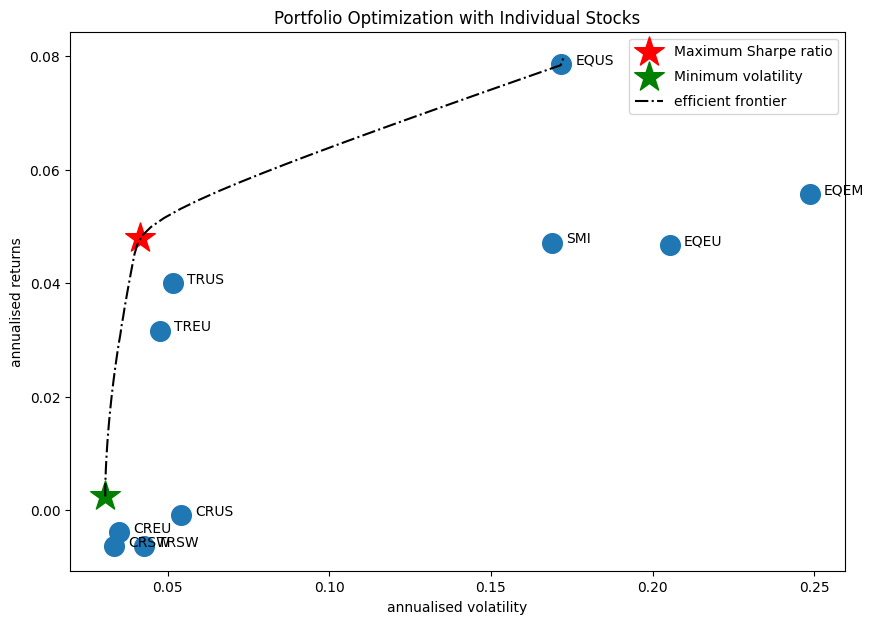

In [ ]:
#filt = (df_stats[df_stats["mean"] > 0]).index
#df_rets = df_rets[filt]
df_rets_no_re = df_rets.iloc[:, 1:-1]

mean_returns = df_rets_no_re.mean() 
cov_matrix = df_rets_no_re.cov()


eff_ptf_no_re, max_shape_no_re, min_sharpe_no_re = display_ef_with_selected(df_rets_no_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=False, limit=0.08)

**WITH REAL ESTATE**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.06
Annualised Volatility: 0.03


            SI_TR  SMI  EQUS  EQEU  EQEM  CRUS   TRUS  TRSW  CRSW  TREU  CREU
allocation  70.27  0.0  6.45   0.0  0.13   0.0  23.15   0.0   0.0   0.0   0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.03
Annualised Volatility: 0.02


            SI_TR  SMI  EQUS  EQEU  EQEM  CRUS  TRUS  TRSW   CRSW  TREU  CREU
allocation  44.41  0.0   0.0   0.0   0.0   0.0   9.6  3.84  42.16   0.0   0.0
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SI_TR : annuaLised return 0.07 , annualised volatility: 0.03
SMI : annuaLised return 0.05 , annualised volatility: 0.17
EQUS : annuaLised return 0.08 , annualised volatility: 0.17
EQEU : annuaLised return 0.05 , 

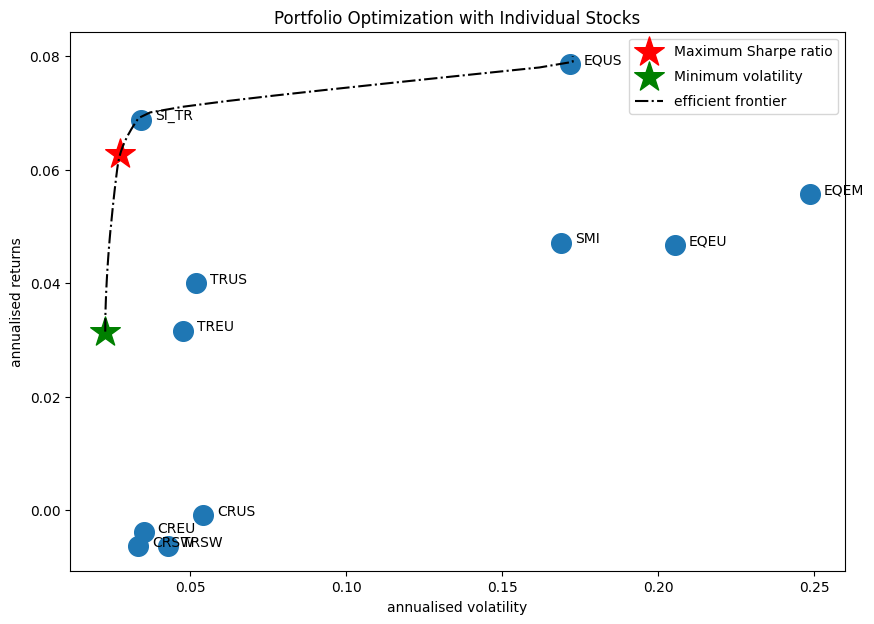

In [ ]:
df_ret_with_re = df_rets.iloc[:, :-1]

mean_returns = df_ret_with_re.mean() 
cov_matrix = df_ret_with_re.cov()


eff_ptf_with_re, max_shape_with_re, min_sharpe_with_re = display_ef_with_selected(df_ret_with_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=False, limit=0.08)

**WITH REAL ESTATE MAX 10%**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.05
Annualised Volatility: 0.04


            SI_TR  SMI   EQUS  EQEU  EQEM  CRUS   TRUS  TRSW  CRSW  TREU  CREU
allocation   10.0  0.0  18.06   0.0   0.0   0.0  71.94   0.0   0.0   0.0   0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.01
Annualised Volatility: 0.03


            SI_TR  SMI  EQUS  EQEU  EQEM  CRUS   TRUS  TRSW   CRSW  TREU  CREU
allocation   10.0  0.0   0.0   0.0   0.0   0.0  16.76  9.01  64.23   0.0   0.0
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SI_TR : annuaLised return 0.07 , annualised volatility: 0.03
SMI : annuaLised return 0.05 , annualised volatility: 0.17
EQUS : annuaLised return 0.08 , annualised volatility: 0.17
EQEU : annuaLised return 0.0

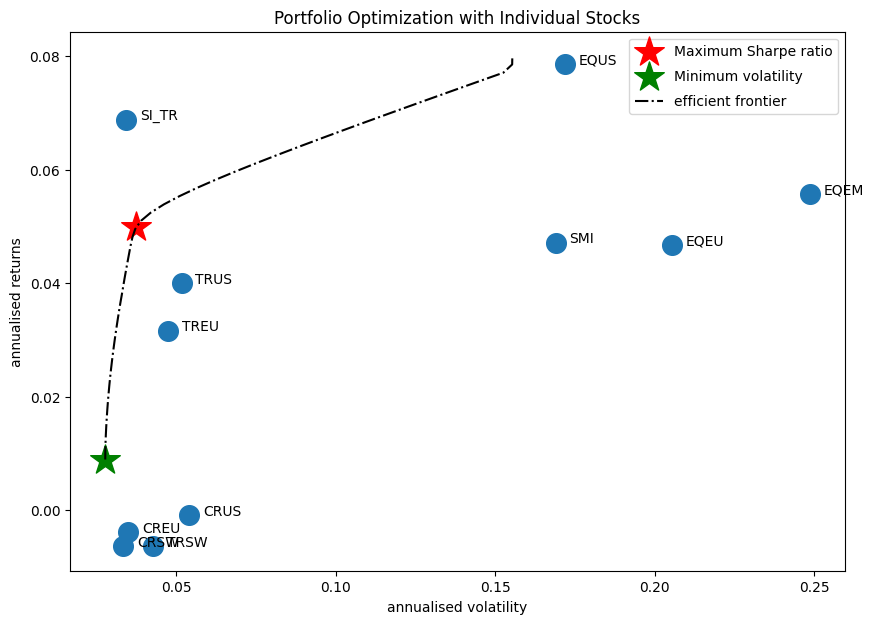

In [ ]:
df_ret_with_re = df_rets.iloc[:, :-1]

mean_returns = df_ret_with_re.mean() 
cov_matrix = df_ret_with_re.cov()
OTHER_CONSTRAINTS = True

eff_ptf_max_re, max_shape_max_re, min_sharpe_max_re = display_ef_with_selected(df_ret_with_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=OTHER_CONSTRAINTS, limit=0.08)

**ONLY SECURITIZED REAL ESTATE**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.05
Annualised Volatility: 0.04


            SMI   EQUS  EQEU  EQEM  CRUS   TRUS  TRSW  CRSW  TREU  CREU  \
allocation  0.0  14.78   0.0   0.0   0.0  65.68   0.0   0.0   0.0   0.0   

            WUPIX-F  
allocation    19.54  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0
Annualised Volatility: 0.03


            SMI  EQUS  EQEU  EQEM  CRUS   TRUS  TRSW   CRSW  TREU  CREU  \
allocation  0.0   0.0   0.0   0.0   0.0  19.67  9.34  69.07   0.0   0.0   

            WUPIX-F  
allocation     1.93  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SMI : annuaLised return 0.05 , annualised volatility: 0.17
EQUS : annuaLised return 0.08 , annualised volatility: 0.17
EQEU : annuaLise

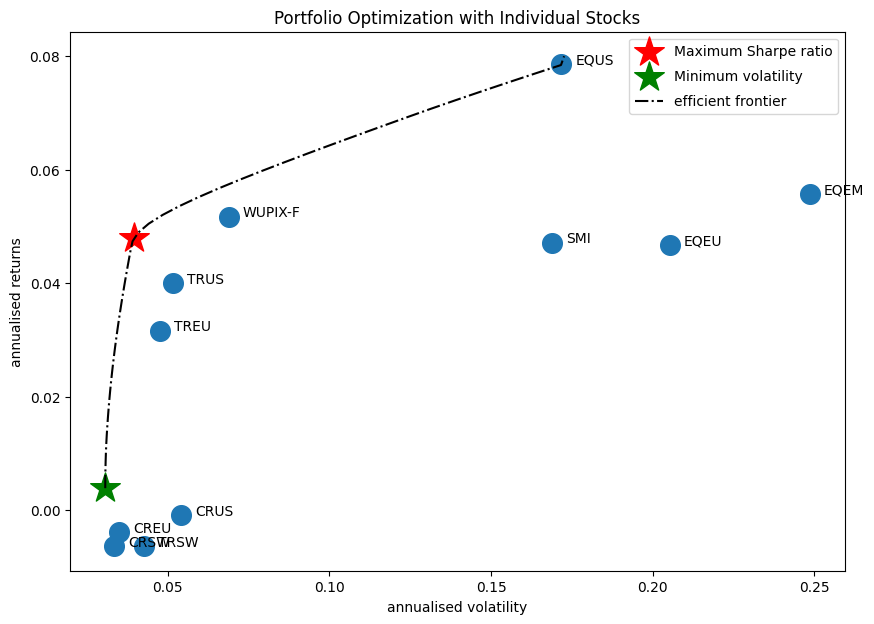

In [ ]:
df_ret_sec_re = df_rets.iloc[:, 1:]

mean_returns = df_ret_sec_re.mean() 
cov_matrix = df_ret_sec_re.cov()

eff_ptf_sec_re, max_shape_sec_re, min_sharpe_sec_re = display_ef_with_selected(df_ret_sec_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=False, limit=0.08)

**WITH SECURITIZED AND DIRECT REAL ESTATE**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.06
Annualised Volatility: 0.03


            SI_TR  SMI  EQUS  EQEU  EQEM  CRUS   TRUS  TRSW  CRSW  TREU  CREU  \
allocation  67.41  0.0  3.44   0.0   0.0   0.0  16.66   0.0   0.0   0.0   0.0   

            WUPIX-F  
allocation    12.49  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.04
Annualised Volatility: 0.02


            SI_TR  SMI  EQUS  EQEU  EQEM  CRUS   TRUS  TRSW   CRSW  TREU  \
allocation  45.09  0.0   0.0   0.0   0.0   0.0  11.97  0.04  37.76   0.0   

            CREU  WUPIX-F  
allocation   0.0     5.13  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SI_TR : annuaLised return 0.07 , annualised volatility: 0.03
SMI : annuaLised return 0.05 , annualised volat

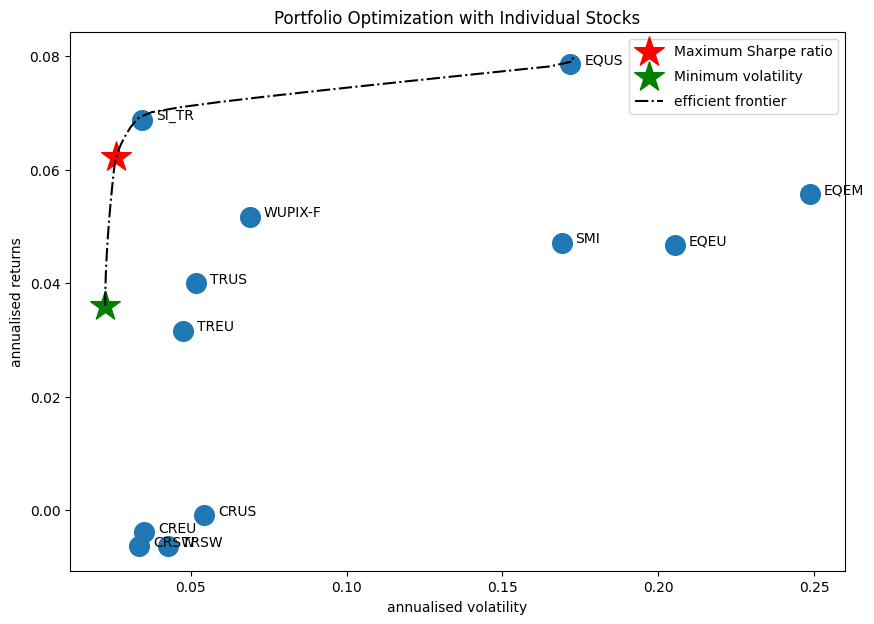

In [ ]:
df_ret_sec_re = df_rets.iloc[:, :]

mean_returns = df_ret_sec_re.mean() 
cov_matrix = df_ret_sec_re.cov()

eff_ptf_sec_dir_re, max_shape_sec_dir_re, min_sharpe_sec_dir_re = display_ef_with_selected(df_ret_sec_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=False, limit=0.08)

COMPARE EFFICIENT FRONTIERS

In [ ]:
eff_ptf_no_re["Type"] = "NO RE"
eff_ptf_with_re["Type"] = "DIR RE"
eff_ptf_sec_re["Type"] = "SEC RE"
eff_ptf_max_re["Type"] = "10% MAX DIR RE"
eff_ptf_sec_dir_re["Type"] = "SEC & DIR RE"

df_eff_ptf = pd.concat([eff_ptf_no_re, eff_ptf_with_re, eff_ptf_sec_re, eff_ptf_max_re, eff_ptf_sec_dir_re], axis=0)
fig = px.line(df_eff_ptf, x=df_eff_ptf.index, y="EF", color='Type', width=800, height=400)
fig.update_xaxes(range=[0, 0.2])
fig.update_layout(
    title="Efficient frontiers for the long-only case",
    xaxis_title="Vol",
    yaxis_title="Ret",
    legend_title="Portfolio",)
fig = format_chart(fig)
fig.show()

In [ ]:
all_no_re = pd.DataFrame(max_shape_no_re.unstack()).reset_index()
all_no_re.columns = ["Asset", "Type", "Weight"]
all_no_re["Type"] = "NO RE"

all_with_re = pd.DataFrame(max_shape_with_re.unstack()).reset_index()
all_with_re.columns = ["Asset", "Type", "Weight"]
all_with_re["Type"] = "DIR RE"


all_max_re = pd.DataFrame(max_shape_max_re.unstack()).reset_index()
all_max_re.columns = ["Asset", "Type", "Weight"]
all_max_re["Type"] = "10% MAX DIR RE"

all_sec_re = pd.DataFrame(max_shape_sec_re.unstack()).reset_index()
all_sec_re.columns = ["Asset", "Type", "Weight"]
all_sec_re["Type"] = "SEC RE"

all_sec_dir_re = pd.DataFrame(max_shape_sec_dir_re.unstack()).reset_index()
all_sec_dir_re.columns = ["Asset", "Type", "Weight"]
all_sec_dir_re["Type"] = "SEC & DIR RE"

In [ ]:
all_ptf = pd.concat([all_no_re, all_with_re, all_max_re, all_sec_re, all_sec_dir_re], axis=0)

fig = px.bar(all_ptf, x="Asset", y="Weight", color="Type", barmode='group', range_y=[0,100])
fig.update_layout(
    title="Allocation for the long-only case",
    legend_title="Portfolio",)
fig = format_chart(fig)

fig.show()

In [ ]:
#for backtest
max_shape_sec_dir_re_lo = max_shape_sec_dir_re
max_shape_no_re_lo = max_shape_no_re
max_shape_sec_re_lo = max_shape_sec_re
max_shape_with_re_lo = max_shape_with_re
max_shape_max_re_lo = max_shape_max_re

**LONG SHORT**

In [ ]:
LONG_ONLY=False

**NO REAL ESTATE**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.1
Annualised Volatility: 0.05


             SMI   EQUS   EQEU  EQEM   CRUS   TRUS   TRSW   CRSW   TREU   CREU
allocation -5.49  38.22 -14.11  5.46 -88.47  100.0 -69.15  100.0  100.0 -66.45
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0
Annualised Volatility: 0.01


            SMI  EQUS  EQEU  EQEM   CRUS   TRUS  TRSW   CRSW   TREU   CREU
allocation  3.9  0.14 -4.11  0.87 -89.89  69.07 -6.61  100.0 -60.62  87.25
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SMI : annuaLised return 0.05 , annualised volatility: 0.17
EQUS : annuaLised return 0.08 , annualised volatility: 0.17
EQEU : annuaLised return 0.05 , annualised volatility: 0.21
EQEM : annuaLised return 0.06 , annuali

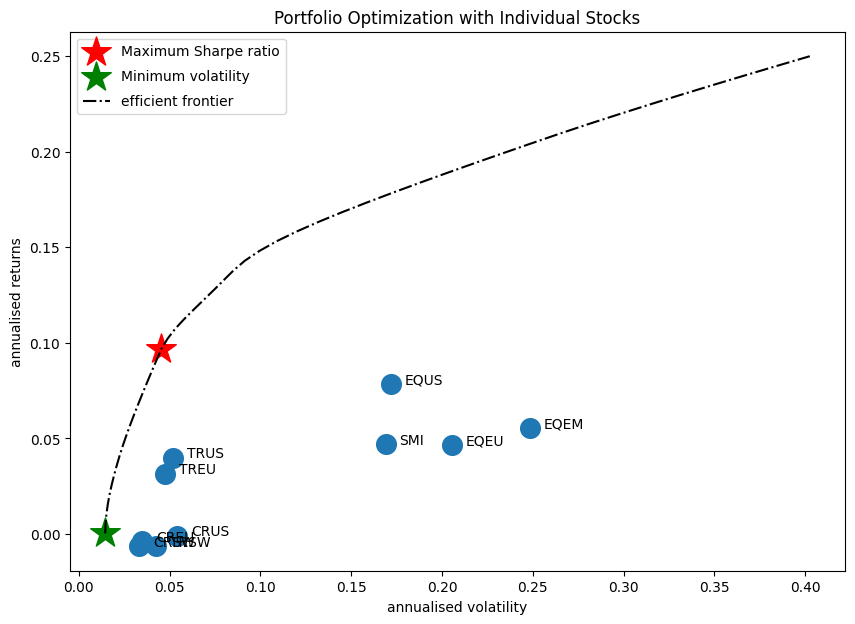

In [ ]:
#filt = (df_stats[df_stats["mean"] > 0]).index
#df_rets = df_rets[filt]
df_rets_no_re = df_rets.iloc[:, 1:-1]

mean_returns = df_rets_no_re.mean() 
cov_matrix = df_rets_no_re.cov()

eff_ptf_no_re, max_shape_no_re, min_sharpe_no_re = display_ef_with_selected(df_rets_no_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=False, long_only=LONG_ONLY, limit=0.25)

**WITH DIRECT REAL ESTATE**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.17
Annualised Volatility: 0.06


            SI_TR   SMI   EQUS   EQEU  EQEM   CRUS   TRUS   TRSW   CRSW  \
allocation  100.0 -9.44  35.96 -12.18  7.17 -25.35  88.96 -100.0  14.89   

             TREU   CREU  
allocation  100.0 -100.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.01
Annualised Volatility: 0.01


            SI_TR   SMI  EQUS  EQEU  EQEM  CRUS   TRUS  TRSW   CRSW   TREU  \
allocation  16.11  2.83  0.31 -4.16  0.99 -73.6  57.24 -7.27  100.0 -49.93   

             CREU  
allocation  57.47  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SI_TR : annuaLised return 0.07 , annualised volatility: 0.03
SMI : annuaLised return 0.05 , annualised volatility: 0.17
EQ

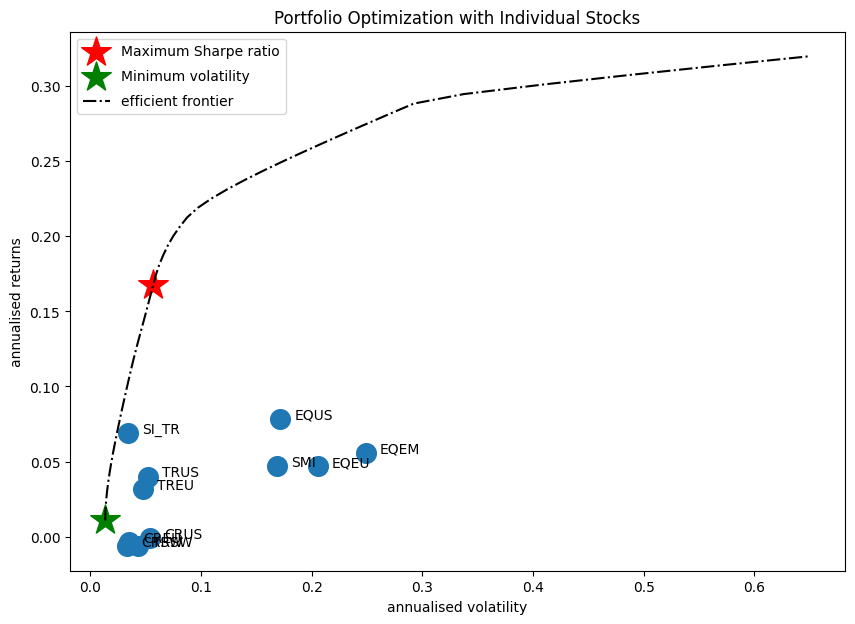

In [ ]:
df_ret_with_re = df_rets.iloc[:, :-1]

mean_returns = df_ret_with_re.mean() 
cov_matrix = df_ret_with_re.cov()
risk_free_rate = 0.01
LONG_ONLY=False

eff_ptf_with_re, max_shape_with_re, min_sharpe_with_re = display_ef_with_selected(df_ret_with_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=False, long_only=LONG_ONLY, limit=0.32)

**WITH REAL ESTATE MAX 10%**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.1
Annualised Volatility: 0.04


            SI_TR   SMI   EQUS   EQEU  EQEM   CRUS   TRUS   TRSW   CRSW  \
allocation   10.0 -5.56  36.18 -13.51  5.83 -83.82  100.0 -73.85  100.0   

             TREU   CREU  
allocation  100.0 -75.26  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.01
Annualised Volatility: 0.01


            SI_TR   SMI  EQUS  EQEU  EQEM  CRUS   TRUS  TRSW   CRSW   TREU  \
allocation   10.0  3.24  0.19 -4.06  0.91 -80.0  61.52 -7.01  100.0 -53.88   

             CREU  
allocation  69.11  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SI_TR : annuaLised return 0.07 , annualised volatility: 0.03
SMI : annuaLised return 0.05 , annualised volatility: 0.17
EQU

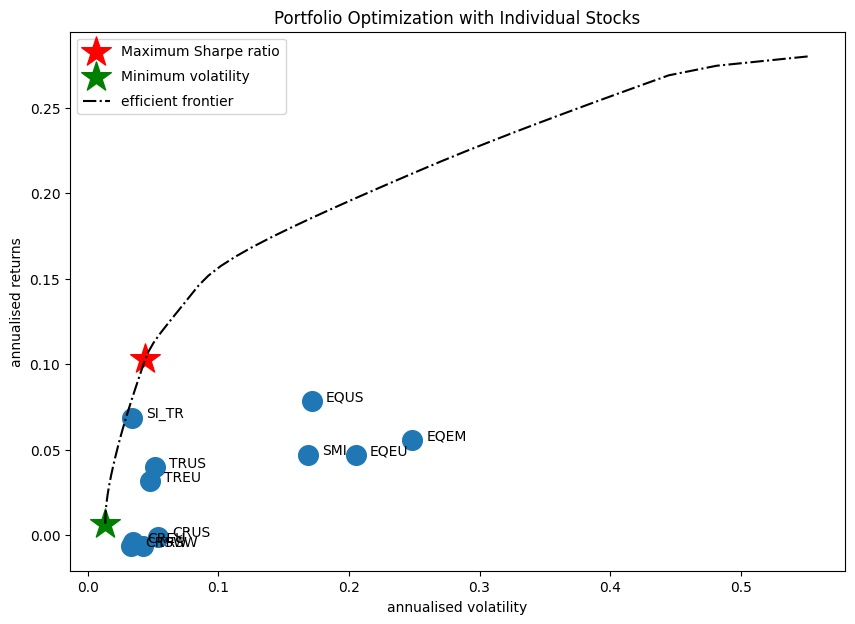

In [ ]:
df_ret_with_re = df_rets.iloc[:, :-1]

mean_returns = df_ret_with_re.mean() 
cov_matrix = df_ret_with_re.cov()
OTHER_CONSTRAINTS = True

eff_ptf_max_re, max_shape_max_re, min_sharpe_max_re = display_ef_with_selected(df_ret_with_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=OTHER_CONSTRAINTS, long_only=LONG_ONLY, limit=0.28)

**ONLY SECURITIZED**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.05


             SMI   EQUS   EQEU  EQEM   CRUS   TRUS   TRSW   CRSW   TREU  \
allocation -7.68  33.65 -11.75  2.48 -90.88  100.0 -88.44  100.0  100.0   

             CREU  WUPIX-F  
allocation -81.45    44.07  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.01
Annualised Volatility: 0.01


             SMI  EQUS  EQEU  EQEM  CRUS   TRUS   TRSW   CRSW   TREU   CREU  \
allocation  3.28 -0.64 -3.69  0.19 -92.3  72.96 -12.72  100.0 -64.45  85.13   

            WUPIX-F  
allocation    12.24  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SMI : annuaLised return 0.05 , annualised volatility: 0.17
EQUS : annuaLised return 0.08 , annualised volatility

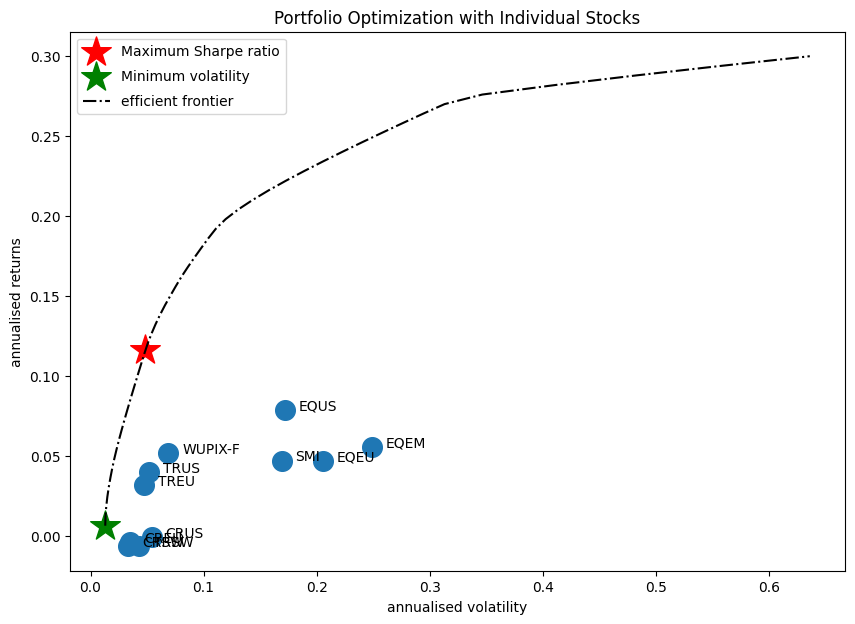

In [ ]:
df_ret_sec_re = df_rets.iloc[:, 1:]

mean_returns = df_ret_sec_re.mean() 
cov_matrix = df_ret_sec_re.cov()

eff_ptf_sec_re, max_shape_sec_re, min_sharpe_sec_re = display_ef_with_selected(df_ret_sec_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=False, long_only=LONG_ONLY, limit=0.30)

**SECURITIZED AND DIRECT**

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.04


            SI_TR   SMI   EQUS  EQEU  EQEM  CRUS   TRUS   TRSW   CRSW   TREU  \
allocation  67.73 -6.86  19.25 -8.95  3.18 -51.6  81.68 -83.46  100.0  43.12   

             CREU  WUPIX-F  
allocation -100.0    35.88  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.02
Annualised Volatility: 0.01


            SI_TR   SMI  EQUS  EQEU  EQEM   CRUS   TRUS   TRSW   CRSW   TREU  \
allocation   17.6  2.06 -0.65 -3.66  0.18 -75.07  59.81 -14.45  100.0 -52.95   

             CREU  WUPIX-F  
allocation  53.75    13.37  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

SI_TR : annuaLised return 0.07 , annualised volatility: 0.03
SMI : annuaLised return 0

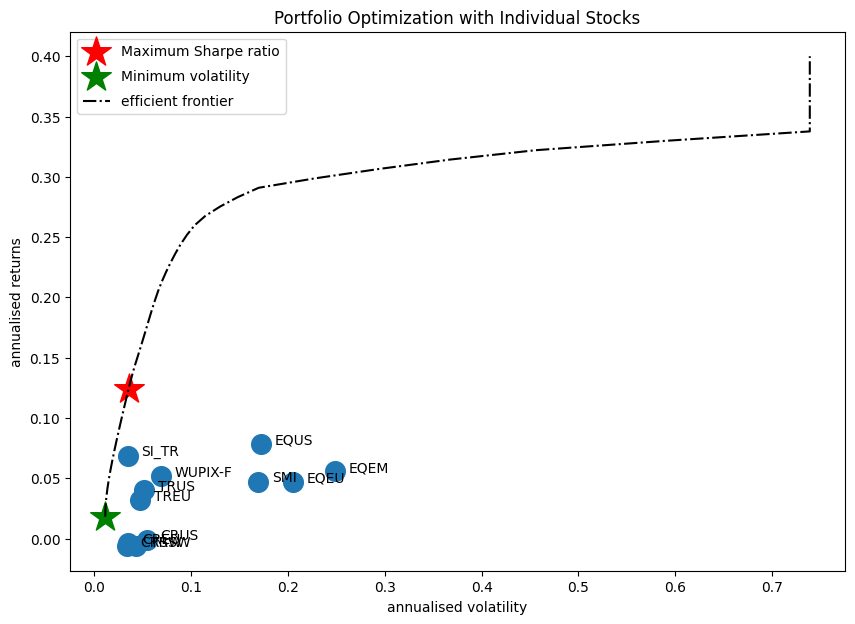

In [ ]:
df_ret_sec_re = df_rets.iloc[:, :]

mean_returns = df_ret_sec_re.mean() 
cov_matrix = df_ret_sec_re.cov()

eff_ptf_sec_dir_re, max_shape_sec_dir_re, min_sharpe_sec_dir_re = display_ef_with_selected(df_ret_sec_re, mean_returns, cov_matrix, risk_free_rate, other_constraints=False, long_only=LONG_ONLY, limit=0.4)

In [ ]:
eff_ptf_no_re["Type"] = "NO RE"
eff_ptf_with_re["Type"] = "DIR RE"
eff_ptf_sec_re["Type"] = "SEC RE"
eff_ptf_max_re["Type"] = "10% MAX DIR RE"
eff_ptf_sec_dir_re["Type"] = "SEC & DIR RE"

df_eff_ptf = pd.concat([eff_ptf_no_re, eff_ptf_with_re, eff_ptf_sec_re, eff_ptf_max_re, eff_ptf_sec_dir_re], axis=0)
fig = px.line(df_eff_ptf, x=df_eff_ptf.index, y="EF", color='Type', width=800, height=400)
fig.update_xaxes(range=[0, 0.4])
fig.update_yaxes(range=[0, 0.35])
fig.update_layout(
    title="Efficient frontiers for the long-short case",
    xaxis_title="Vol",
    yaxis_title="Ret",
    legend_title="Portfolio",)
fig = format_chart(fig)

fig.show()

In [ ]:
all_no_re = pd.DataFrame(max_shape_no_re.unstack()).reset_index()
all_no_re.columns = ["Asset", "Type", "Weight"]
all_no_re["Type"] = "NO RE"

all_with_re = pd.DataFrame(max_shape_with_re.unstack()).reset_index()
all_with_re.columns = ["Asset", "Type", "Weight"]
all_with_re["Type"] = "DIR RE"

all_max_re = pd.DataFrame(max_shape_max_re.unstack()).reset_index()
all_max_re.columns = ["Asset", "Type", "Weight"]
all_max_re["Type"] = "10% MAX DIR RE"

all_sec_re = pd.DataFrame(max_shape_sec_re.unstack()).reset_index()
all_sec_re.columns = ["Asset", "Type", "Weight"]
all_sec_re["Type"] = "SEC RE"

all_sec__dir_re = pd.DataFrame(max_shape_sec_dir_re.unstack()).reset_index()
all_sec__dir_re.columns = ["Asset", "Type", "Weight"]
all_sec__dir_re["Type"] = "SEC & DIR RE"

In [ ]:
all_ptf = pd.concat([all_no_re, all_with_re, all_max_re, all_sec_re, all_sec__dir_re], axis=0)

fig = px.bar(all_ptf, x="Asset", y="Weight", color="Type", barmode='group', range_y=[-100,100])
fig.update_layout(
    title="Allocation for the long-short case",
    legend_title="Portfolio",)
fig = format_chart(fig)
fig.show()

In [ ]:
all_ptf.set_index("Asset").groupby("Type")["Weight"].sum()

Type
10% MAX DIR RE    100.01
DIR RE            100.01
NO RE             100.01
SEC & DIR RE       99.97
SEC RE            100.00
Name: Weight, dtype: float64

In [ ]:
df_bt = df_rets.mul(max_shape_sec_dir_re/100, axis=1)

In [ ]:
max_shape_sec_dir_re.T.to_dict()["allocation"]

{'SI_TR': 67.73,
 'SMI': -6.86,
 'EQUS': 19.25,
 'EQEU': -8.95,
 'EQEM': 3.18,
 'CRUS': -51.6,
 'TRUS': 81.68,
 'TRSW': -83.46,
 'CRSW': 100.0,
 'TREU': 43.12,
 'CREU': -100.0,
 'WUPIX-F': 35.88}

In [ ]:
vars = [max_shape_no_re, max_shape_with_re, max_shape_max_re, max_shape_sec_re, max_shape_sec_dir_re]
labels = ["NO RE - σ=5%", "DIR RE - σ=6%", "MAX 10% RE - σ=4%", "SEC RE - σ=5%", "SEC & DIR RE - σ=4%"]

fig = go.Figure()
c = 0
for i in vars:
  ptf_w = i
  ptf_w = ptf_w.T.to_dict()["allocation"]


  df_w = pd.DataFrame(index = df_rets.index, columns=i.columns)
  df_w = df_w.assign(**ptf_w) /100

  df_perf_ls = df_rets.mul(df_w, axis=0)
  df_perf_ls["RET"] = df_perf_ls.sum(axis=1)
  df_perf_ls["TOT"] = 100*(1+df_perf_ls["RET"]).cumprod()

  fig.add_trace(go.Scatter(x=df_perf_ls.index, y=df_perf_ls["TOT"], name=labels[c]))
  c+=1

fig.add_trace(go.Scatter(x=df_norm.iloc[1:, :].index, y=df_norm.iloc[1:, :]["EQUS"]*100, name="S&P500", line=dict(color='black', dash='dash')))

fig = format_chart(fig)
fig.update_layout(title="Returns with long-short weights")
fig.show()

In [ ]:
df_norm["EQUS"]

1Q97    1.000000
2Q97    1.169088
3Q97    1.251162
4Q97    1.281739
1Q98    1.455185
          ...   
4Q21    6.295145
1Q22    5.983741
2Q22    4.999709
3Q22    4.735867
4Q22    5.071191
Name: EQUS, Length: 104, dtype: float64

In [ ]:
vars = [max_shape_no_re_lo, max_shape_with_re_lo, max_shape_max_re_lo, max_shape_sec_re_lo, max_shape_sec_dir_re_lo]
labels = ["NO RE", "DIR RE", "MAX 10% RE", "SEC RE", "SEC & DIR RE"]

fig = go.Figure()
c=0
for i in vars:
  ptf_w = i
  ptf_w = ptf_w.T.to_dict()["allocation"]


  df_w = pd.DataFrame(index = df_rets.index, columns=i.columns)
  df_w = df_w.assign(**ptf_w) /100

  df_perf_ls = df_rets.mul(df_w, axis=0)
  df_perf_ls["RET"] = df_perf_ls.sum(axis=1)
  df_perf_ls["TOT"] = 100*(1+df_perf_ls["RET"]).cumprod()

  fig.add_trace(go.Scatter(x=df_perf_ls.index, y=df_perf_ls["TOT"], name=labels[c]))
  c+=1

fig.add_trace(go.Scatter(x=df_norm.iloc[1:, :].index, y=df_norm.iloc[1:, :]["EQUS"]*100, name="S&P500", line=dict(color='black', dash='dash')))

fig = format_chart(fig)
fig.update_layout(title="Returns with long-only weights")
fig.show()

In [ ]:
df_perf_ls.reset_index()

,index,SI_TR,SMI,EQUS,EQEU,EQEM,CRUS,TRUS,TRSW,CRSW,TREU,CREU,WUPIX-F,RET,TOT
0,2Q97,0.006549,0.0,0.005817,0.0,0.0,0.0,0.005681,NaN,NaN,NaN,NaN,0.006664,0.024711,102.471087
1,3Q97,0.003410,0.0,0.002415,0.0,-0.0,0.0,0.005632,NaN,NaN,NaN,NaN,0.002488,0.013946,103.900153
2,4Q97,-0.008782,0.0,0.000841,-0.0,-0.0,0.0,0.005628,NaN,NaN,NaN,NaN,0.006257,0.003943,104.309828
3,1Q98,0.014089,0.0,0.004655,0.0,0.0,0.0,0.002532,NaN,NaN,NaN,NaN,0.005896,0.027172,107.144125
4,2Q98,-0.002047,0.0,0.001002,0.0,-0.0,0.0,0.004407,NaN,NaN,NaN,NaN,-0.005670,-0.002308,106.896807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4Q21,0.019598,0.0,0.003663,0.0,-0.0,-0.0,0.000449,-0.0,-0.0,-0.0,-0.0,0.000675,0.024385,482.292112
99,1Q22,0.012506,-0.0,-0.001702,-0.0,-0.0,-0.0,-0.009073,-0.0,-0.0,-0.0,-0.0,-0.004950,-0.003218,480.739982
100,2Q22,0.010169,-0.0,-0.005657,-0.0,-0.0,-0.0,-0.006083,-0.0,-0.0,-0.0,-0.0,-0.014352,-0.015923,473.085264
101,3Q22,0.017608,-0.0,-0.001815,-0.0,-0.0,-0.0,-0.007570,0.0,-0.0,-0.0,-0.0,-0.002990,0.005233,475.560896
